# Proyecto 1 del grupo 3: Desafío Empresarial - Análisis de Cohortes para los Pagos de Ironhack

## PARTICIPANTES

* Carla Fernández
* Jesús Ramírez
* Moisès Gómez 

## Introducción

IronHack Payments, una empresa de servicios financieros de vanguardia, ha estado ofreciendo soluciones innovadoras de adelanto de efectivo desde su creación en 2020. Con un compromiso de proporcionar adelantos de dinero gratuitos y precios transparentes, IronHack Payments ha logrado una base de usuarios sustancial. Como parte de su esfuerzo continuo por mejorar sus servicios y entender el comportamiento de los usuarios, IronHack Payments ha encargado un proyecto de análisis de cohortes.

## Visión General del Proyecto

En este proyecto, realizarás un análisis de cohortes exhaustivo basado en datos proporcionados por IronHack Payments. El objetivo principal es analizar cohortes de usuarios definidos por el mes de creación de su primer adelanto en efectivo. Seguirás la evolución mensual de las métricas clave para estas cohortes, lo que permitirá a IronHack Payments obtener valiosas perspectivas sobre el comportamiento de los usuarios y el rendimiento de sus servicios financieros.

### Métricas a Analizar

Calcularás y analizarás las siguientes métricas para cada cohorte:

1. **Frecuencia de Uso del Servicio:** Comprender con qué frecuencia los usuarios de cada cohorte utilizan los servicios de adelanto de efectivo de IronHack Payments a lo largo del tiempo.
2. **Tasa de Incidentes:** Determinar la tasa de incidentes, enfocándose específicamente en los incidentes de pago, para cada cohorte. Identificar si hay variaciones en las tasas de incidentes entre diferentes cohortes.
3. **Ingresos Generados por la Cohorte:** Calcular el total de ingresos generados por cada cohorte a lo largo de los meses para evaluar el impacto financiero del comportamiento de los usuarios.
4. **Nueva Métrica Relevante:** Proponer y calcular una nueva métrica relevante que brinde perspectivas adicionales sobre el comportamiento de los usuarios o el rendimiento de los servicios de IronHack Payments.

### Herramientas de Análisis de Datos

Se espera que realices el análisis de cohortes utilizando Python, aprovechando principalmente la biblioteca Pandas para la manipulación y análisis de datos. Sin embargo, el análisis principal debe realizarse utilizando Python.

### Análisis Exploratorio de Datos (EDA)

Antes de sumergirte en el análisis de cohortes, realiza un análisis exploratorio de datos para obtener una comprensión completa del conjunto de datos. Explora estadísticas clave, distribuciones y visualizaciones para identificar patrones y valores atípicos. El EDA te ayudará a tomar decisiones informadas sobre estrategias de preprocesamiento y análisis de datos.

### Análisis de la Calidad de Datos

Evalúa la calidad del conjunto de datos identificando valores faltantes, inconsistencias en los datos y posibles errores. Implementa pasos de limpieza y preprocesamiento de datos para garantizar la fiabilidad de tu análisis. Documenta cualquier problema de calidad de datos encontrado y los pasos tomados para abordarlos.

### Entregables

1. **Código en Python:** Proporciona código en Python bien documentado que realice el análisis de cohortes, incluyendo la carga de datos, preprocesamiento, creación de cohortes, cálculo de métricas y visualización.
2. **Informe de Análisis Exploratorio de Datos:** Prepara un informe que resuma los hallazgos de tu análisis exploratorio de datos. Incluye visualizaciones e insights que ayuden a entender el conjunto de datos.
3. **Informe de Análisis de la Calidad de Datos:** Documenta los resultados de tu análisis de calidad de datos, destacando cualquier problema y los pasos tomados para resolverlos.
4. **Presentación Corta:** Crea una presentación concisa (máximo de 4 diapositivas) que resuma tus hallazgos del análisis de cohortes y las perspectivas clave obtenidas del EDA y el análisis de calidad de datos. Esta presentación debe ser adecuada para compartir con el equipo de IronHack Payments.

In [1]:
# Interpretación del problema
# La frecuencia de uso del servicio, tendremos en cuenta los paramtros 'user_id' y 'deleted_id' para saber la frecuencia.
# Los cohortes estan definidos por la fecha del 'create at' de cash y fees.
# Los ingresos generados por la cohorte, el 'amount' del cash * el 'total amount' del fees y agrupados por los meses.
# La Tasa de incidentes, esta relacionado con el 'Type' de Fees.

# Saber si el ID de cash y fees son los mismos
# 'user_id' y 'deleted_acount_id' son parametros que estan vinculados.

# Preparar datos

En esta sección haremos una primera exploración ràpida para la limpieza de los datos.

In [2]:
#importacion de librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Carga de los datasets
lexique = pd.read_excel("./project_dataset/Lexique - Data Analyst.xlsx")
cash = pd.read_csv("./project_dataset/extract - cash request - data analyst.csv")
fees = pd.read_csv("./project_dataset/extract - fees - data analyst - .csv")

In [4]:
lexique.head(12)

,Column name,Description
0,id,Unique ID of the fee object
1,type,Type of fee\nPossible values are :\n\n- instan...
2,status,Status of the fees (= does the fees was succes...
3,category,Describe the reason of the incident fee.\n\n2 ...
4,reason,Description of the fee
5,created_at,Timestamp of the fee's creation
6,updated_at,Timestamp of the latest fee's details update
7,paid_at,Timestamp of the fee's payment
8,from_date,Apply only to postpone fees. Initial date of r...
9,to_date,Apply only to postpone fees. New date of reimb...


In [5]:
lexique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16375 entries, 0 to 16374
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Column name  16003 non-null  object
 1   Description  13 non-null     object
dtypes: object(2)
memory usage: 256.0+ KB


In [6]:
# Observamos que el lexique contine un total de 13 valores diferentes de none y que el column_name indica el encabezado del documento de fees y el description contiene la 
# descripción de las celdas. Tambien observamos que tiene 16003 filas vacias.

In [7]:
#TODO: Limpiar filas sobrantes.

In [8]:
cash

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00,2021-02-06 20:17:49.292493+00,13681.0,NaN,NaN,2021-02-06 11:00:00+00,2020-10-13,2021-02-06 20:17:49.257521+00,instant,2020-10-12 13:54:24.352856+00,NaN,NaN,NaN
23966,25243,50.0,money_back,2020-10-27 14:41:25.73491+00,2020-12-18 13:15:40.843946+00,NaN,NaN,30367.0,2020-11-03 22:00:00+00,2020-10-28,2020-12-01 13:26:53.787672+00,instant,2020-10-27 14:41:57.901946+00,completed,2020-11-12 23:20:41.928788+00,2020-12-01 13:26:53.815504+00
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,2021-02-05 12:19:30.626289+00,instant,2020-10-20 07:58:14.171553+00,NaN,NaN,NaN
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,2021-02-05 13:14:19.689906+00,instant,2020-10-10 05:41:23.368363+00,NaN,NaN,NaN


In [9]:
fees.head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [10]:
print("cash\n",cash[cash['id']==1594])
print("fees\n",fees[fees['id']==1594])


cash
      id  amount    status                     created_at  \
4  1594   100.0  rejected  2020-05-06 09:59:38.877376+00   

                     updated_at  user_id                   moderated_at  \
4  2020-05-07 09:21:55.34008+00   7686.0  2020-05-07 09:21:55.320193+00   

   deleted_account_id      reimbursement_date cash_request_received_date  \
4                 NaN  2020-06-05 22:00:00+00                        NaN   

  money_back_date transfer_type send_at recovery_status reco_creation  \
4             NaN       regular     NaN             NaN           NaN   

  reco_last_update  
4              NaN  
fees
         id  cash_request_id      type    status               category  \
9949  1594           4065.0  incident  accepted  rejected_direct_debit   

      total_amount                 reason                     created_at  \
9949           5.0  rejected direct debit  2020-07-18 22:29:38.254506+00   

                         updated_at                        paid_at from_

In [11]:
print("cash\n",cash[cash['id']==6961])
print("fees\n",fees[fees['id']==6961])

cash
          id  amount      status                     created_at  \
14584  6961   100.0  money_back  2020-07-07 17:45:03.352406+00   

                          updated_at  user_id                   moderated_at  \
14584  2020-12-18 13:10:14.466442+00  13539.0  2020-07-08 13:45:03.327043+00   

       deleted_account_id      reimbursement_date cash_request_received_date  \
14584                 NaN  2020-08-04 23:51:00+00                 2020-07-10   

                     money_back_date transfer_type send_at recovery_status  \
14584  2020-12-01 05:59:29.957802+00       regular     NaN       completed   

                       reco_creation               reco_last_update  
14584  2020-08-15 22:48:56.581966+00  2020-12-01 05:59:29.975858+00  
fees
      id  cash_request_id      type    status               category  \
1  6961          11714.0  incident  accepted  rejected_direct_debit   

   total_amount                 reason                     created_at  \
1           5.0  rej

In [12]:
pd.merge(cash, fees, on='id').head()

,id,amount,status_x,created_at_x,updated_at_x,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,status_y,category,total_amount,reason,created_at_y,updated_at_y,paid_at,from_date,to_date,charge_moment
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,...,accepted,NaN,5.0,Postpone Cash Request 2568,2020-06-09 10:55:46.687183+00,2020-10-13 14:25:01.328917+00,NaN,2020-06-26 22:00:00+00,2020-07-26 22:00:00+00,before
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,...,cancelled,NaN,5.0,Postpone Cash Request 1796,2020-06-23 08:20:48.886973+00,2020-10-13 14:25:14.644112+00,NaN,2020-06-06 22:00:00+00,2020-07-05 21:44:16.477+00,after
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,...,cancelled,NaN,5.0,Postpone Cash Request 1518,2020-06-23 08:20:48.412006+00,2020-10-13 14:25:15.072076+00,NaN,2020-05-27 22:00:00+00,2020-06-27 03:49:38.153+00,after
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,...,accepted,NaN,5.0,Postpone Cash Request 2278,2020-05-30 03:49:55.393806+00,2020-10-13 14:25:00.784465+00,NaN,2020-06-12 22:00:00+00,2020-07-09 22:00:00+00,before
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,...,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-07-18 22:29:38.254506+00,2020-10-13 14:25:04.253057+00,2020-10-19 10:59:55.753868+00,NaN,NaN,after


In [13]:
pd.merge(cash, fees, on='id')[['id', 'created_at_x', 'created_at_y', 'status_x', 'status_y', 'type', 'category']]

,id,created_at_x,created_at_y,status_x,status_y,type,category
0,5,2019-12-10 19:05:21.596873+00,2020-06-09 10:55:46.687183+00,rejected,accepted,postpone,NaN
1,70,2019-12-10 19:50:12.34778+00,2020-06-23 08:20:48.886973+00,rejected,cancelled,postpone,NaN
2,7,2019-12-10 19:13:35.82546+00,2020-06-23 08:20:48.412006+00,rejected,cancelled,postpone,NaN
3,10,2019-12-10 19:16:10.880172+00,2020-05-30 03:49:55.393806+00,rejected,accepted,postpone,NaN
4,1594,2020-05-06 09:59:38.877376+00,2020-07-18 22:29:38.254506+00,rejected,accepted,incident,rejected_direct_debit
...,...,...,...,...,...,...,...
18428,7930,2020-07-14 08:55:09.360786+00,2020-09-16 13:25:32.025583+00,money_back,accepted,instant_payment,NaN
18429,16834,2020-09-19 07:37:14.351567+00,2020-10-24 06:21:45.166366+00,money_back,cancelled,postpone,NaN
18430,20616,2020-10-12 13:54:11.686225+00,2020-10-31 09:54:06.451518+00,money_back,cancelled,postpone,NaN
18431,20256,2020-10-10 05:40:55.700422+00,2020-10-30 16:54:40.368674+00,money_back,accepted,instant_payment,NaN


In [14]:
pd.merge(cash, fees, left_on='id', right_on='cash_request_id').sample(5)

,id_x,amount,status_x,created_at_x,updated_at_x,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,status_y,category,total_amount,reason,created_at_y,updated_at_y,paid_at,from_date,to_date,charge_moment
13226,14633,100.0,money_back,2020-09-05 07:46:47.834397+00,2020-12-18 13:11:32.667547+00,28853.0,2020-09-05 11:25:19.273732+00,NaN,2020-10-05 22:00:00+00,2020-09-08,...,cancelled,NaN,5.0,Postpone Cash Request 14633,2020-10-05 12:55:36.893277+00,2020-10-13 14:25:07.34603+00,NaN,2020-10-05 22:00:00+00,2020-10-17 10:00:00+00,after
11045,4989,50.0,money_back,2020-06-24 15:12:56.776899+00,2020-12-18 13:11:00.112345+00,NaN,2020-06-24 15:37:14.742526+00,5664.0,2020-07-03 22:00:00+00,2020-06-27,...,cancelled,NaN,5.0,Postpone Cash Request 4989,2020-06-24 16:34:12.445647+00,2020-10-13 14:25:14.631945+00,NaN,2020-07-03 22:00:00+00,2020-08-02 22:00:00+00,after
16491,22861,100.0,money_back,2020-10-21 17:37:14.7701+00,2020-12-18 13:12:33.746639+00,74815.0,NaN,NaN,2020-10-31 11:00:00+00,NaN,...,cancelled,NaN,5.0,Postpone Cash Request 22861,2020-11-01 19:28:02.19109+00,2020-11-01 19:28:02.191113+00,NaN,2020-10-31 11:00:00+00,2020-12-01 11:00:00+00,before
17743,26058,50.0,money_back,2020-10-29 11:51:43.778552+00,2020-12-18 13:12:59.666098+00,96889.0,NaN,NaN,2020-12-01 22:00:00+00,2020-10-30,...,accepted,NaN,5.0,Instant Payment Cash Request 26058,2020-10-29 11:52:28.191402+00,2020-10-29 11:52:28.191437+00,2020-12-01 19:36:16.696295+00,NaN,NaN,after
14760,20953,70.0,money_back,2020-10-13 23:59:07.000449+00,2020-12-18 13:12:00.698849+00,62433.0,NaN,NaN,2020-11-10 22:00:00+00,2020-10-15,...,accepted,NaN,5.0,Instant Payment Cash Request 20953,2020-10-14 00:00:01.685106+00,2020-10-14 00:00:01.685134+00,2020-11-10 19:55:56.220068+00,NaN,NaN,after


In [15]:
# Podemos obervar que el Fees tiene 13 columnas y muchas de ellas tiene valor None. 

In [16]:
fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [17]:
fees.sample(10)

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
10262,3071,11373.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 11373,2020-08-07 13:59:10.591986+00,2020-10-13 14:25:04.874734+00,2020-09-05 19:43:13.264413+00,NaN,NaN,after
12293,4601,12881.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 12881,2020-08-21 12:42:29.609257+00,2020-10-13 14:25:08.384166+00,2020-09-09 09:46:04.248162+00,NaN,NaN,after
16545,1084,4273.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 4273,2020-07-05 16:20:20.402382+00,2020-10-13 14:25:16.114078+00,NaN,2020-07-08 22:00:00+00,2020-07-23 22:00:00+00,after
19335,12344,3404.0,incident,cancelled,month_delay_on_payment,5.0,month delay on payment - 8/2020,2020-10-09 23:04:04.624999+00,2020-12-15 17:07:42.908443+00,NaN,NaN,NaN,after
8541,16521,23604.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23604,2020-10-23 16:22:31.747761+00,2020-10-23 16:22:31.747784+00,2020-11-04 14:24:25.716901+00,NaN,NaN,after
2693,4308,10712.0,postpone,accepted,NaN,5.0,Postpone Cash Request 10712,2020-08-19 10:09:41.141154+00,2020-10-13 14:25:06.577411+00,2020-08-19 10:09:45.1398+00,2020-09-05 22:00:00+00,2020-10-05 22:00:00+00,before
5335,14227,15433.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-10-17 00:11:28.645321+00,2020-12-09 15:36:58.972889+00,2020-12-07 16:51:36.733488+00,NaN,NaN,after
15963,11694,18675.0,postpone,accepted,NaN,5.0,Postpone Cash Request 18675,2020-10-07 15:49:05.435493+00,2020-10-13 14:25:15.203988+00,2020-10-07 15:49:09.059515+00,2020-10-26 22:00:00+00,2020-11-25 11:00:00+00,before
5678,13229,17273.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 17273,2020-10-13 22:15:33.302969+00,2020-10-13 22:15:33.303014+00,NaN,2020-10-16 13:19:23.282035+00,2020-10-31 11:00:00+00,after
7709,14960,22297.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 22297,2020-10-19 23:14:48.058331+00,2020-10-19 23:14:48.058374+00,2020-11-03 19:48:57.144598+00,NaN,NaN,after


In [18]:
fees['total_amount'].describe()

count    21061.000000
mean         5.000237
std          0.034453
min          5.000000
25%          5.000000
50%          5.000000
75%          5.000000
max         10.000000
Name: total_amount, dtype: float64

In [19]:
fees.groupby('total_amount').count()

,id,cash_request_id,type,status,category,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
total_amount,,,,,,,,,,,,
5.0,21060,21056,21060,21060,2196,21060,21060,21060,15530,7766,7766,21060
10.0,1,1,1,1,0,1,1,1,1,0,0,1


In [20]:
#El total amount es 10.0 o 5.0

In [21]:
fees.groupby('status').count()

,id,cash_request_id,type,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
status,,,,,,,,,,,,
accepted,14841,14841,14841,1560,14841,14841,14841,14841,14523,2985,2985,14841
cancelled,4938,4934,4938,97,4938,4938,4938,4938,90,4780,4780,4938
confirmed,88,88,88,19,88,88,88,88,2,0,0,88
rejected,1194,1194,1194,520,1194,1194,1194,1194,916,1,1,1194


In [22]:
#Tiene 4 estados: accepted, cancelled, confirmed, rejected

In [23]:
set(cash.columns) & set(fees.columns)

{'created_at', 'id', 'status', 'updated_at'}

In [24]:
# Tanto fees como fash estan vinculados a estos 4 identificadores.

#Variables
##Frecuencia de uso de servicio
cash.user_id
cash.deleted_account_id (cuenta como uso?)

created_month a extraer de 'created_at'

La frecuencia se refiere a la cohorte?

In [25]:
cash[cash['user_id'] == 231.0]

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
434,1293,100.0,rejected,2020-04-20 01:47:15.38493+00,2020-04-20 09:09:02.1137+00,231.0,2020-04-20 09:09:02.109199+00,NaN,2020-05-02 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1380,2933,100.0,money_back,2020-06-10 18:26:50.085351+00,2020-12-18 13:08:36.317354+00,231.0,2020-06-11 11:19:13.12836+00,NaN,2020-07-17 22:00:00+00,2020-06-13,2020-07-19 22:00:00+00,regular,NaN,NaN,NaN,NaN
1392,1461,100.0,money_back,2020-04-29 22:27:17.998022+00,2020-06-10 16:05:03.1476+00,231.0,2020-04-30 10:44:40.99108+00,NaN,2020-06-01 22:00:00+00,2020-05-05,2020-06-10 16:05:03.147262+00,regular,NaN,NaN,NaN,NaN
9104,769,100.0,money_back,2020-02-29 15:33:39.425986+00,2020-11-04 12:55:55.465728+00,231.0,2020-02-29 15:35:42.000663+00,NaN,2020-04-05 22:00:00+00,2020-03-02,2020-04-14 20:26:02.498434+00,regular,NaN,NaN,NaN,NaN
9218,396,100.0,money_back,2020-01-07 16:40:50.839262+00,2020-11-04 12:55:12.047839+00,231.0,2020-01-08 09:17:46.917255+00,NaN,2020-02-11 23:00:00+00,2020-01-10,NaN,regular,NaN,NaN,NaN,NaN
13079,9291,100.0,money_back,2020-07-21 16:42:30.71593+00,2020-12-18 13:09:40.955221+00,231.0,2020-07-21 17:46:22.989524+00,NaN,2020-07-30 22:00:00+00,2020-07-23,2020-07-30 22:00:00+00,regular,2020-07-28 16:42:30.715508+00,NaN,NaN,NaN
14684,10563,100.0,money_back,2020-08-02 12:18:49.662247+00,2020-12-18 13:10:17.051826+00,231.0,2020-08-02 16:22:11.247348+00,NaN,2020-09-01 22:00:00+00,2020-08-05,2020-09-01 22:00:00+00,regular,2020-08-09 12:18:49.661783+00,NaN,NaN,NaN
18491,19968,100.0,money_back,2020-10-09 01:08:17.542886+00,2020-12-18 13:11:44.328981+00,231.0,NaN,NaN,2020-10-30 22:00:00+00,2020-10-09,2020-11-03 23:00:00+00,instant,2020-10-09 01:08:34.096632+00,NaN,NaN,NaN
22075,14484,100.0,money_back,2020-09-04 08:27:22.790976+00,2020-12-18 13:13:18.258385+00,231.0,NaN,NaN,2020-09-30 22:00:00+00,2020-09-05,2020-10-06 22:00:00+00,instant,2020-09-11 08:27:22.732887+00,NaN,NaN,NaN



# Pregunta 1

Frecuencia de Uso del Servicio: Comprender con qué frecuencia los usuarios de cada cohorte utilizan los servicios de adelanto de efectivo de IronHack Payments a lo largo del tiempo.


Puntos a tener encuenta:

a. Necesitamos calcular los cohortes (año y mes del create_at)
  * se tiene que revisar limpieza de create_at (está en cash y en fees) (ex. nulos)
  * En principio consideramos que si es nulo el create_at, no se ha hecho el préstamo

b. Necesitamos el user_id (y posible deleted_account_id)
  * limpieza pues hay usuarios eliminados (unificaremos user_id y deleted_account_id)
  * comprobar que no queden nulos
 
c. Encontrar el cohorte de cada usuario (es el primer préstamo)
   * comprobar que todos los usuarios tienen cohorte. Pueden haber usuarios que no han solicitado ningún adelanto? (frecuencia 0)
   * el menor cohorte de cada user_id unificado
     
d. Encontrar el número de préstamos de un usuario
   * el total (count) de préstamos de cada usuario que tenga cohorte

e. Asociar a cada cohorte la frecuencia
   * generar charts

In [26]:
# 1a. Estudiamos cálculo de cohortes
total_filas = len(cash)
print(f"El total de filas es: {total_filas}")
cash.info()
print("Comprobamos que no hay nulos en el cash.created_at")

El total de filas es: 23970
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  rec

In [27]:
# Creamos una columna con la cohorte en cash

# cash['año_mes'] = cash['created_at'].dt.date  # versión alternativa que no funciona en todas las instalaciones

cash['año_mes'] = pd.to_datetime(cash['created_at']).dt.strftime('%Y-%m')
cash



,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,año_mes
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00,2021-02-06 20:17:49.292493+00,13681.0,NaN,NaN,2021-02-06 11:00:00+00,2020-10-13,2021-02-06 20:17:49.257521+00,instant,2020-10-12 13:54:24.352856+00,NaN,NaN,NaN,2020-10
23966,25243,50.0,money_back,2020-10-27 14:41:25.73491+00,2020-12-18 13:15:40.843946+00,NaN,NaN,30367.0,2020-11-03 22:00:00+00,2020-10-28,2020-12-01 13:26:53.787672+00,instant,2020-10-27 14:41:57.901946+00,completed,2020-11-12 23:20:41.928788+00,2020-12-01 13:26:53.815504+00,2020-10
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,2021-02-05 12:19:30.626289+00,instant,2020-10-20 07:58:14.171553+00,NaN,NaN,NaN,2020-10
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,2021-02-05 13:14:19.689906+00,instant,2020-10-10 05:41:23.368363+00,NaN,NaN,NaN,2020-10


In [28]:
# Crear una columna que contenga el user_id y si es NaN, que contenga el deleted_account_id. Le llamamos: unified_user_id
cash['unified_user_id'] = cash['user_id'].fillna(cash['deleted_account_id'])
cash

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,año_mes,unified_user_id
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12,804.0
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12,231.0
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12,191.0
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12,761.0
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-05,7686.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00,2021-02-06 20:17:49.292493+00,13681.0,NaN,NaN,2021-02-06 11:00:00+00,2020-10-13,2021-02-06 20:17:49.257521+00,instant,2020-10-12 13:54:24.352856+00,NaN,NaN,NaN,2020-10,13681.0
23966,25243,50.0,money_back,2020-10-27 14:41:25.73491+00,2020-12-18 13:15:40.843946+00,NaN,NaN,30367.0,2020-11-03 22:00:00+00,2020-10-28,2020-12-01 13:26:53.787672+00,instant,2020-10-27 14:41:57.901946+00,completed,2020-11-12 23:20:41.928788+00,2020-12-01 13:26:53.815504+00,2020-10,30367.0
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,2021-02-05 12:19:30.626289+00,instant,2020-10-20 07:58:14.171553+00,NaN,NaN,NaN,2020-10,82122.0
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,2021-02-05 13:14:19.689906+00,instant,2020-10-10 05:41:23.368363+00,NaN,NaN,NaN,2020-10,64517.0


In [29]:
# Comprobamos si han quedado NaNs en unified_user_id
print(f"unified_user_id: no nulos {cash['unified_user_id'].notna().sum()} y nulos {cash['unified_user_id'].isna().sum()}")

unified_user_id: no nulos 23970 y nulos 0


In [30]:
# 1.c. Encontrar el cohorte de cada usuario (es el primer préstamo)
# Primero filtraremos aquellos prestamos que no son correctos
# XXX Eliminar el comentario siguiente
print(f"Los diferentes status son: {cash['status'].unique()}")

user_cohorte = cash.groupby('unified_user_id')['año_mes'].min()     # también puede ser .first() ya que aparecen ordenados por created_at|\| 
print("Cohortes por usuario")
print(user_cohorte.head(10))

# Comprobemos que el usuario 231 tenga la cohorte esperada (2020-01 y no 2019-12 porque está rejected)
print("Comprobación del cohorte conocido para el usuario 231. Se espera 2020-01")
print(user_cohorte[231])

print(f"El número total de usuarios con cohorte es {len(user_cohorte)} de los {cash['unified_user_id'].count()} usuarios originales")

Los diferentes status son: ['rejected' 'money_back' 'canceled' 'active' 'direct_debit_rejected'
 'transaction_declined' 'direct_debit_sent']
Cohortes por usuario
unified_user_id
34.0    2020-04
35.0    2019-12
47.0    2019-11
52.0    2019-12
53.0    2019-12
66.0    2020-04
68.0    2019-12
70.0    2020-04
72.0    2020-01
73.0    2020-01
Name: año_mes, dtype: object
Comprobación del cohorte conocido para el usuario 231. Se espera 2020-01
2019-12
El número total de usuarios con cohorte es 11793 de los 23970 usuarios originales


In [31]:
# 1d. Encontrar el número de préstamos de un usuario
prestamos_por_usuario = cash.groupby('unified_user_id')['unified_user_id'].count()
print(prestamos_por_usuario.head(10))

# comprobación usuario conocido 231 se espera 10 préstamos
print("Comprobación del número de préstamos del conocido para el usuario 231. Se espera 10")
print(prestamos_por_usuario[231])

unified_user_id
34.0     1
35.0     7
47.0     8
52.0     4
53.0     4
66.0     1
68.0     1
70.0     1
72.0    12
73.0     7
Name: unified_user_id, dtype: int64
Comprobación del número de préstamos del conocido para el usuario 231. Se espera 10
10


In [32]:
# Crear un dataframe con los dos serials (prestamos_por_usuario, user_cohorte)
# Agrupar por cohorte y sumar los préstamos
# Graficar Eje "X" tiempo(x mes) y Eje"Y" cantidad de pedidos. El grafico debe responder: Cuantos pedidos hizo cada cohorte por mes?

In [33]:
# Nuevo objetivo es conseguir un dataframe que contenga la cohorte real de cada usuario y el mes real en el que se está realizando el pedido

In [34]:
# Añadimos la columna con la cohorte real para cada pedido

print(cash.head())

     id  amount    status                     created_at  \
0     5   100.0  rejected  2019-12-10 19:05:21.596873+00   
1    70   100.0  rejected   2019-12-10 19:50:12.34778+00   
2     7   100.0  rejected   2019-12-10 19:13:35.82546+00   
3    10    99.0  rejected  2019-12-10 19:16:10.880172+00   
4  1594   100.0  rejected  2020-05-06 09:59:38.877376+00   

                      updated_at  user_id                   moderated_at  \
0   2019-12-11 16:47:42.40783+00    804.0  2019-12-11 16:47:42.405646+00   
1  2019-12-11 14:24:22.900054+00    231.0  2019-12-11 14:24:22.897988+00   
2  2019-12-11 09:46:59.779773+00    191.0  2019-12-11 09:46:59.777728+00   
3  2019-12-18 14:26:18.136163+00    761.0  2019-12-18 14:26:18.128407+00   
4   2020-05-07 09:21:55.34008+00   7686.0  2020-05-07 09:21:55.320193+00   

   deleted_account_id             reimbursement_date  \
0                 NaN  2020-01-09 19:05:21.596363+00   
1                 NaN   2020-01-09 19:50:12.34778+00   
2             

In [35]:
cash['cohorte'] = cash['unified_user_id'].map(user_cohorte)

# Comprobemos que el usuario 231 tenga todos sus pedidos asociados a su cohorte
print("Comprobación del cohorte conocido para el usuario 231. Se espera 2019-12")
cash[cash['unified_user_id'] == 231]

Comprobación del cohorte conocido para el usuario 231. Se espera 2019-12


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,año_mes,unified_user_id,cohorte
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12,231.0,2019-12
434,1293,100.0,rejected,2020-04-20 01:47:15.38493+00,2020-04-20 09:09:02.1137+00,231.0,2020-04-20 09:09:02.109199+00,NaN,2020-05-02 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-04,231.0,2019-12
1380,2933,100.0,money_back,2020-06-10 18:26:50.085351+00,2020-12-18 13:08:36.317354+00,231.0,2020-06-11 11:19:13.12836+00,NaN,2020-07-17 22:00:00+00,2020-06-13,2020-07-19 22:00:00+00,regular,NaN,NaN,NaN,NaN,2020-06,231.0,2019-12
1392,1461,100.0,money_back,2020-04-29 22:27:17.998022+00,2020-06-10 16:05:03.1476+00,231.0,2020-04-30 10:44:40.99108+00,NaN,2020-06-01 22:00:00+00,2020-05-05,2020-06-10 16:05:03.147262+00,regular,NaN,NaN,NaN,NaN,2020-04,231.0,2019-12
9104,769,100.0,money_back,2020-02-29 15:33:39.425986+00,2020-11-04 12:55:55.465728+00,231.0,2020-02-29 15:35:42.000663+00,NaN,2020-04-05 22:00:00+00,2020-03-02,2020-04-14 20:26:02.498434+00,regular,NaN,NaN,NaN,NaN,2020-02,231.0,2019-12
9218,396,100.0,money_back,2020-01-07 16:40:50.839262+00,2020-11-04 12:55:12.047839+00,231.0,2020-01-08 09:17:46.917255+00,NaN,2020-02-11 23:00:00+00,2020-01-10,NaN,regular,NaN,NaN,NaN,NaN,2020-01,231.0,2019-12
13079,9291,100.0,money_back,2020-07-21 16:42:30.71593+00,2020-12-18 13:09:40.955221+00,231.0,2020-07-21 17:46:22.989524+00,NaN,2020-07-30 22:00:00+00,2020-07-23,2020-07-30 22:00:00+00,regular,2020-07-28 16:42:30.715508+00,NaN,NaN,NaN,2020-07,231.0,2019-12
14684,10563,100.0,money_back,2020-08-02 12:18:49.662247+00,2020-12-18 13:10:17.051826+00,231.0,2020-08-02 16:22:11.247348+00,NaN,2020-09-01 22:00:00+00,2020-08-05,2020-09-01 22:00:00+00,regular,2020-08-09 12:18:49.661783+00,NaN,NaN,NaN,2020-08,231.0,2019-12
18491,19968,100.0,money_back,2020-10-09 01:08:17.542886+00,2020-12-18 13:11:44.328981+00,231.0,NaN,NaN,2020-10-30 22:00:00+00,2020-10-09,2020-11-03 23:00:00+00,instant,2020-10-09 01:08:34.096632+00,NaN,NaN,NaN,2020-10,231.0,2019-12
22075,14484,100.0,money_back,2020-09-04 08:27:22.790976+00,2020-12-18 13:13:18.258385+00,231.0,NaN,NaN,2020-09-30 22:00:00+00,2020-09-05,2020-10-06 22:00:00+00,instant,2020-09-11 08:27:22.732887+00,NaN,NaN,NaN,2020-09,231.0,2019-12


In [36]:
# Como paso intermedio veremos cuantos pedidos hay por año-mes
adelantos_mes_serie = cash.groupby('año_mes')['año_mes'].count()    # alternativa .size()
adelantos_mes = adelantos_mes_serie.to_frame(name='adelantos').reset_index()
adelantos_mes

,año_mes,adelantos
0,2019-11,1
1,2019-12,289
2,2020-01,223
3,2020-02,184
4,2020-03,244
5,2020-04,473
6,2020-05,837
7,2020-06,2615
8,2020-07,3601
9,2020-08,3417


In [37]:
# Ahora sí, incluimos cohorte
adelantos_mes_serie = cash.groupby(['año_mes', 'cohorte'])['año_mes'].count()    # alternativa .size()
adelantos_mes = adelantos_mes_serie.to_frame(name='adelantos').reset_index()
adelantos_mes

,año_mes,cohorte,adelantos
0,2019-11,2019-11,1
1,2019-12,2019-11,1
2,2019-12,2019-12,288
3,2020-01,2019-12,106
4,2020-01,2020-01,117
...,...,...,...
78,2020-11,2020-07,7
79,2020-11,2020-08,10
80,2020-11,2020-09,20
81,2020-11,2020-10,15


cohorte  2019-11  2019-12  2020-01  2020-02  2020-03  2020-04  2020-05  \
año_mes                                                                  
2019-11      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
2019-12      1.0    288.0      0.0      0.0      0.0      0.0      0.0   
2020-01      0.0    106.0    117.0      0.0      0.0      0.0      0.0   
2020-02      0.0     63.0     24.0     97.0      0.0      0.0      0.0   
2020-03      0.0     79.0     17.0     49.0     99.0      0.0      0.0   

cohorte  2020-06  2020-07  2020-08  2020-09  2020-10  2020-11  
año_mes                                                        
2019-11      0.0      0.0      0.0      0.0      0.0      0.0  
2019-12      0.0      0.0      0.0      0.0      0.0      0.0  
2020-01      0.0      0.0      0.0      0.0      0.0      0.0  
2020-02      0.0      0.0      0.0      0.0      0.0      0.0  
2020-03      0.0      0.0      0.0      0.0      0.0      0.0  


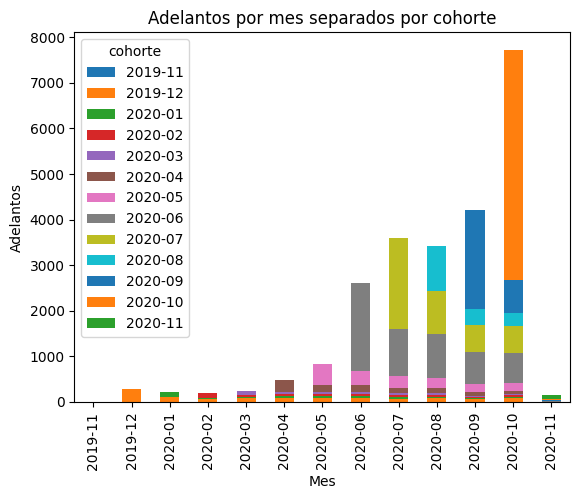

In [38]:
df_pivot = adelantos_mes.pivot(index='año_mes', columns='cohorte', values='adelantos').fillna(0)
print(df_pivot.head())
df_pivot.plot(kind='bar', stacked=True)
plt.xlabel('Mes')
plt.ylabel('Adelantos')
plt.title('Adelantos por mes separados por cohorte')
plt.show()

<Axes: xlabel='año_mes', ylabel='adelantos'>

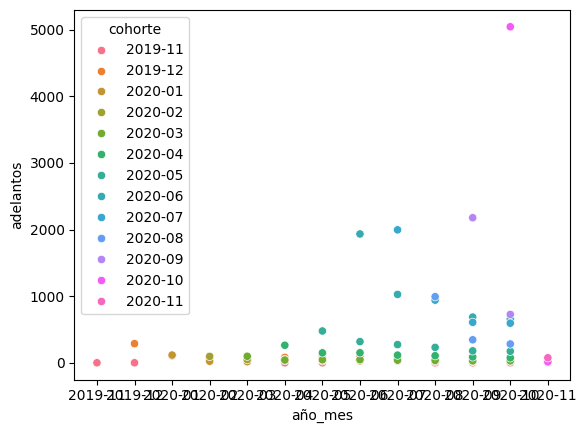

In [39]:
sns.scatterplot(
    data=adelantos_mes,
    x='año_mes',
    y='adelantos',
    hue='cohorte')

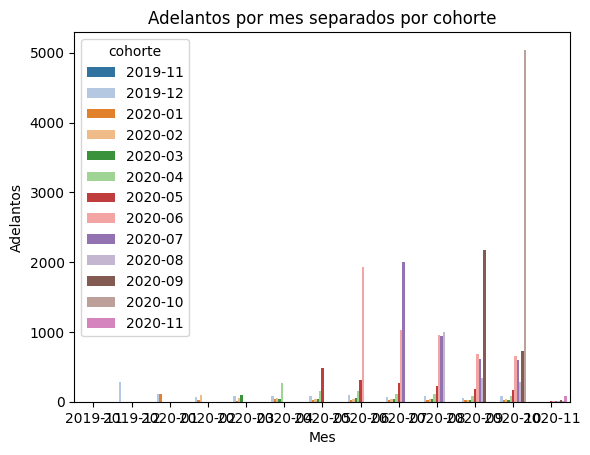

In [40]:
sns.barplot(data=adelantos_mes, x='año_mes', y='adelantos', hue='cohorte', palette='tab20')

plt.title('Adelantos por mes separados por cohorte')
plt.xlabel('Mes')
plt.ylabel('Adelantos')
plt.show()

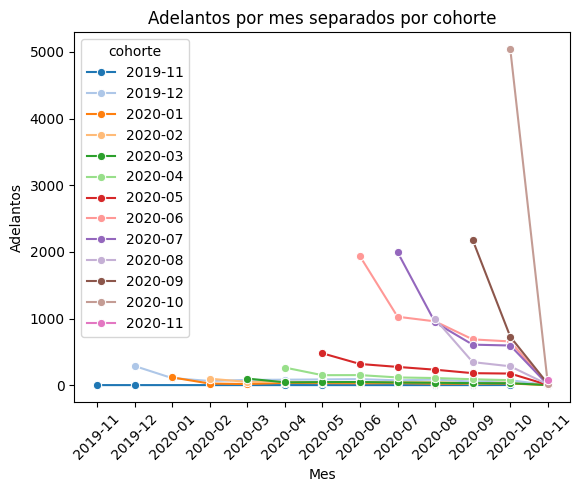

In [41]:
sns.lineplot(data=adelantos_mes, x='año_mes', y='adelantos', hue='cohorte', palette='tab20', marker='o')

plt.title('Adelantos por mes separados por cohorte')
plt.xlabel('Mes')
plt.ylabel('Adelantos')
plt.xticks(rotation=45)
plt.show()

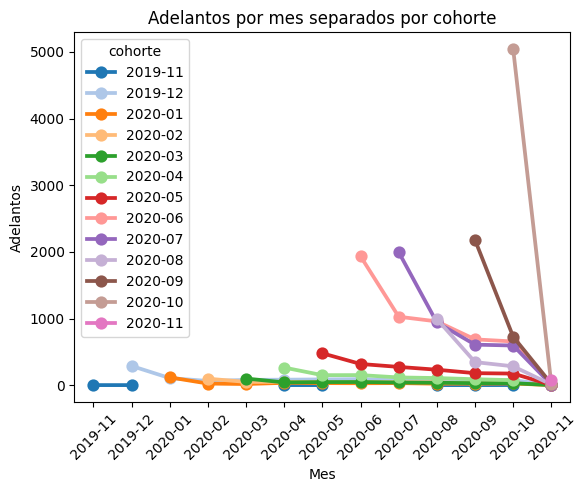

In [42]:
sns.pointplot(data=adelantos_mes, x='año_mes', y='adelantos', hue='cohorte', palette='tab20')

plt.title('Adelantos por mes separados por cohorte')
plt.xlabel('Mes')
plt.ylabel('Adelantos')
plt.xticks(rotation=45)
plt.show()

# Pregunta 2

Tasa de Incidentes: Determinar la tasa de incidentes, enfocándose específicamente en los incidentes de pago, para cada cohorte. Identificar si hay variaciones en las tasas de incidentes entre diferentes cohortes.

In [43]:
print("Merge de cash y fees")
cash_fees = pd.merge(cash, fees, left_on='id', right_on='cash_request_id')
cash_fees.sample(5)

Merge de cash y fees


,id_x,amount,status_x,created_at_x,updated_at_x,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,status_y,category,total_amount,reason,created_at_y,updated_at_y,paid_at,from_date,to_date,charge_moment
20154,23397,100.0,money_back,2020-10-23 10:51:14.533439+00,2020-12-18 13:14:51.638451+00,86513.0,NaN,NaN,2020-11-07 11:00:00+00,NaN,...,accepted,NaN,5.0,Instant Payment Cash Request 23397,2020-10-23 10:52:45.851674+00,2020-10-23 10:52:45.851702+00,2020-11-07 19:42:35.464385+00,NaN,NaN,after
19523,23474,100.0,money_back,2020-10-23 13:28:32.230028+00,2020-12-18 13:14:04.387805+00,88778.0,NaN,NaN,2020-11-03 22:00:00+00,NaN,...,cancelled,NaN,5.0,Postpone Cash Request 23474,2020-10-30 16:52:09.948236+00,2020-10-30 16:52:09.94827+00,NaN,2020-11-03 22:00:00+00,2020-11-09 23:00:00+00,before
20760,21876,100.0,money_back,2020-10-18 00:31:22.211675+00,2020-12-18 13:16:22.645713+00,54369.0,NaN,NaN,2020-12-05 11:00:00+00,2020-10-18,...,cancelled,NaN,5.0,Postpone Cash Request 21876,2020-10-30 16:51:37.030654+00,2020-10-30 16:51:37.030691+00,NaN,2020-11-05 22:00:00+00,2020-12-03 23:00:00+00,before
19520,15015,50.0,money_back,2020-09-07 19:08:30.032851+00,2020-12-18 13:14:04.365076+00,24409.0,2020-09-08 08:08:08.731454+00,NaN,2020-11-05 22:00:00+00,2020-09-09,...,accepted,NaN,5.0,Postpone Cash Request 15015,2020-09-26 20:45:28.816219+00,2020-10-13 14:25:14.175519+00,2020-09-26 20:45:32.766292+00,2020-10-06 22:00:00+00,2020-11-05 22:00:00+00,before
4845,15980,100.0,money_back,2020-09-13 19:53:03.826782+00,2020-12-18 13:09:11.041055+00,39111.0,NaN,NaN,2020-11-11 23:00:00+00,2020-09-15,...,accepted,NaN,5.0,Instant Payment Cash Request 15980,2020-09-13 20:17:39.176186+00,2020-10-13 14:25:10.921801+00,2020-11-12 19:35:39.225865+00,NaN,NaN,after


In [44]:
print("Nos centramos en las entradas con categoria considerando que son las que tienen incidencia de pago")
incidentes = cash_fees[cash_fees['category'].notna()]
incidentes.sample(5)

Nos centramos en las entradas con categoria considerando que son las que tienen incidencia de pago


,id_x,amount,status_x,created_at_x,updated_at_x,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,status_y,category,total_amount,reason,created_at_y,updated_at_y,paid_at,from_date,to_date,charge_moment
722,7154,100.0,money_back,2020-07-08 12:59:53.370876+00,2021-02-05 02:33:34.454639+00,9199.0,2020-07-08 13:06:47.443654+00,NaN,2020-08-05 22:00:00+00,2020-07-09,...,accepted,month_delay_on_payment,5.0,month delay on payment - 9/2020,2020-09-11 23:02:45.006361+00,2020-10-13 14:25:16.469689+00,2021-02-05 02:33:34.491522+00,NaN,NaN,after
20820,13365,100.0,money_back,2020-08-20 16:56:01.421431+00,2020-12-18 13:16:32.259265+00,21043.0,2020-08-20 17:16:11.189967+00,NaN,2020-09-09 22:00:00+00,2020-08-22,...,accepted,month_delay_on_payment,5.0,month delay on payment - 10/2020,2020-10-22 01:20:26.373634+00,2020-10-22 01:20:26.373665+00,2020-12-12 19:33:06.400069+00,NaN,NaN,after
1229,10158,100.0,direct_debit_rejected,2020-07-30 13:51:08.337803+00,2020-09-29 22:08:02.880454+00,4205.0,2020-07-30 14:07:53.454457+00,NaN,2020-08-28 22:00:00+00,2020-07-31,...,rejected,month_delay_on_payment,5.0,month delay on payment - 10/2020,2020-10-31 23:37:08.444435+00,2020-10-31 23:37:08.444459+00,NaN,NaN,NaN,after
6949,8712,100.0,money_back,2020-07-17 16:29:17.415383+00,2020-12-18 13:09:51.157718+00,12724.0,2020-07-19 15:02:42.270182+00,NaN,2020-08-30 22:00:00+00,2020-07-21,...,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-03 22:58:10.57278+00,2020-10-13 14:25:08.813225+00,2020-09-16 11:03:02.50907+00,NaN,NaN,after
3707,3056,100.0,money_back,2020-06-11 20:53:58.247608+00,2020-12-18 13:08:45.189009+00,9366.0,2020-06-12 11:03:17.164022+00,NaN,2020-07-03 22:00:00+00,2020-06-17,...,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-07-16 00:58:53.856316+00,2020-10-13 14:25:02.533327+00,2020-08-06 08:42:29.448735+00,NaN,NaN,after


In [45]:
print("Número de incidencias por cohorte")
incidentes.groupby('cohorte')['cohorte'].count().to_frame(name='incidencias').reset_index()

Número de incidencias por cohorte


,cohorte,incidencias
0,2019-12,53
1,2020-01,15
2,2020-02,24
3,2020-03,32
4,2020-04,119
5,2020-05,234
6,2020-06,776
7,2020-07,576
8,2020-08,149
9,2020-09,195


 3.   Ingresos Generados por la Cohorte: Calcular el total de ingresos generados por cada cohorte a lo largo de los meses para evaluar el impacto financiero del comportamiento de los usuarios.
 4.   Nueva Métrica Relevante: Proponer y calcular una nueva métrica relevante que brinde perspectivas adicionales sobre el comportamiento de los usuarios o el rendimiento de los servicios de IronHack Payments.
